# Q1

## Libraries

In [1]:
# Install yfinance if not already installed
# !pip install yfinance

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set options for better display in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Retrieve data

In [2]:
# Define the date range
start_date = '2022-01-01'
end_date = '2022-11-01'

# Define the list of cryptocurrency tickers compatible with Yahoo Finance
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD']

# Fetch the adjusted closing prices from Yahoo Finance
price_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Display the first few rows of the data
print("Adjusted Closing Prices:")
price_data.head()

[*********************100%***********************]  5 of 5 completed

Adjusted Closing Prices:


Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,
2022-01-01,1.37698,527.35272,47686.81250,3769.69702,0.84947
2022-01-02,1.37758,531.39667,47345.21875,3829.56494,0.85912
2022-01-03,1.32164,512.13599,46458.11719,3761.38037,0.83289
2022-01-04,1.31166,507.50610,45897.57422,3794.05664,0.82467
2022-01-05,1.23600,475.05695,43569.00391,3550.38696,0.77436


## Daily returns

In [3]:
# Calculate daily returns
returns_df = price_data.pct_change().dropna()

# Display the first few rows of returns
print("Daily Returns:")
returns_df.head()

Daily Returns:


Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,,
2022-01-02,0.00044,0.00767,-0.00716,0.01588,0.01136
2022-01-03,-0.04061,-0.03625,-0.01874,-0.01780,-0.03053
2022-01-04,-0.00755,-0.00904,-0.01207,0.00869,-0.00986
2022-01-05,-0.05768,-0.06394,-0.05073,-0.06422,-0.06101
2022-01-06,0.03542,-0.00375,-0.00937,-0.03717,0.00902


## Initial capital

In [4]:
initial_capital = 1000.0

## Assign Random Weights to the Assets

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random weights
weights = np.random.rand(len(tickers))
weights /= np.sum(weights)  # Normalize to sum to 1

# Create a DataFrame for asset weights
weights_df = pd.DataFrame({'Ticker': tickers, 'Weight': weights})

print("Asset Weights:")
weights_df

Asset Weights:


,Ticker,Weight
0,BTC-USD,0.13320
1,ETH-USD,0.33810
2,BNB-USD,0.26032
3,XRP-USD,0.21290
4,ADA-USD,0.05548


## Implement the Buy and Hold Strategy Considering Transaction Fees

In [6]:
# Transaction fee of 0.5%
transaction_fee_rate = 0.005

# Calculate capital allocated to each asset before fees
allocated_capital = initial_capital * weights

# Calculate transaction fees for each asset
transaction_fees = allocated_capital * transaction_fee_rate

# Capital allocated to each asset after deducting transaction fees
capital_after_fees = allocated_capital - transaction_fees

# Fetch the initial prices (first available prices in the data)
initial_prices = price_data.iloc[0]

# Calculate the number of units purchased for each asset
units_purchased = capital_after_fees / initial_prices

# Create a DataFrame for the portfolio at inception
portfolio = pd.DataFrame({
    'Ticker': tickers,
    'Weight': weights,
    'Allocated Capital ($)': allocated_capital,
    'Transaction Fees ($)': transaction_fees,
    'Capital After Fees ($)': capital_after_fees,
    'Initial Price ($)': initial_prices.values,
    'Units Purchased': units_purchased.values
})

print("Portfolio at Inception:")
portfolio

Portfolio at Inception:


,Ticker,Weight,Allocated Capital ($),Transaction Fees ($),Capital After Fees ($),Initial Price ($),Units Purchased
0,BTC-USD,0.13320,133.19703,0.66599,132.53104,1.37698,96.24796
1,ETH-USD,0.33810,338.10082,1.69050,336.41031,527.35272,0.63792
2,BNB-USD,0.26032,260.31769,1.30159,259.01610,47686.81250,0.00543
3,XRP-USD,0.21290,212.89984,1.06450,211.83534,3769.69702,0.05619
4,ADA-USD,0.05548,55.48463,0.27742,55.20721,0.84947,64.99002


## Calculate the Portfolio Value Over Time

In [7]:
# Multiply the price data by the units purchased to get the daily value of each asset
daily_value = price_data.mul(units_purchased, axis=1)

# Calculate the total portfolio value by summing across all assets
daily_value['Total Portfolio Value'] = daily_value.sum(axis=1)

# Display the first few rows of the portfolio value
print("Daily Portfolio Value:")
daily_value.head()

Daily Portfolio Value:


Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD,Total Portfolio Value
Date,,,,,,
2022-01-01,132.53104,336.41031,259.01610,211.83534,55.20721,995.00000
2022-01-02,132.58965,338.99004,257.16070,215.19957,55.83410,999.77406
2022-01-03,127.20487,326.70321,252.34231,211.36799,54.12922,971.74760
2022-01-04,126.24441,323.74970,249.29766,213.20421,53.59552,966.09150
2022-01-05,118.96267,303.04965,236.64977,199.51137,50.32554,908.49901


## Calculate Performance Metrics at the End of the Period

### Expected return

In [8]:
# Calculate total return of the portfolio
final_portfolio_value = daily_value['Total Portfolio Value'].iloc[-1]
total_return = (final_portfolio_value - initial_capital) / initial_capital

print(f"Expected Return over the period: {total_return:.2%}")

Expected Return over the period: -52.27%


### Risk (Variance)

In [9]:
# Calculate daily portfolio returns
daily_portfolio_returns = daily_value['Total Portfolio Value'].pct_change().dropna()

# Calculate variance of daily returns
portfolio_variance = daily_portfolio_returns.var()

print(f"Portfolio Variance (Daily): {portfolio_variance:.6f}")

Portfolio Variance (Daily): 0.001305


### Sharpe ratio

In [10]:
# Calculate annualized return and standard deviation
mean_daily_return = daily_portfolio_returns.mean()
std_daily_return = daily_portfolio_returns.std()

# Annualize the mean return and standard deviation (Assuming 252 trading days per year)
annualized_return = mean_daily_return * 252
annualized_std = std_daily_return * np.sqrt(252)

# Calculate Sharpe Ratio
sharpe_ratio = annualized_return / annualized_std

print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Standard Deviation: {annualized_std:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Annualized Return: -44.38%
Annualized Standard Deviation: 57.34%
Sharpe Ratio: -0.7739


### Maximum Drawdown

In [11]:
# Calculate the running maximum of the portfolio value
running_max = daily_value['Total Portfolio Value'].cummax()

# Calculate daily drawdown
drawdown = (daily_value['Total Portfolio Value'] - running_max) / running_max

# Calculate maximum drawdown
max_drawdown = drawdown.min()

print(f"Maximum Drawdown: {max_drawdown:.2%}")

Maximum Drawdown: -65.12%


## Visualize the Portfolio Performance

### Plot the Total Portfolio Value Over Time

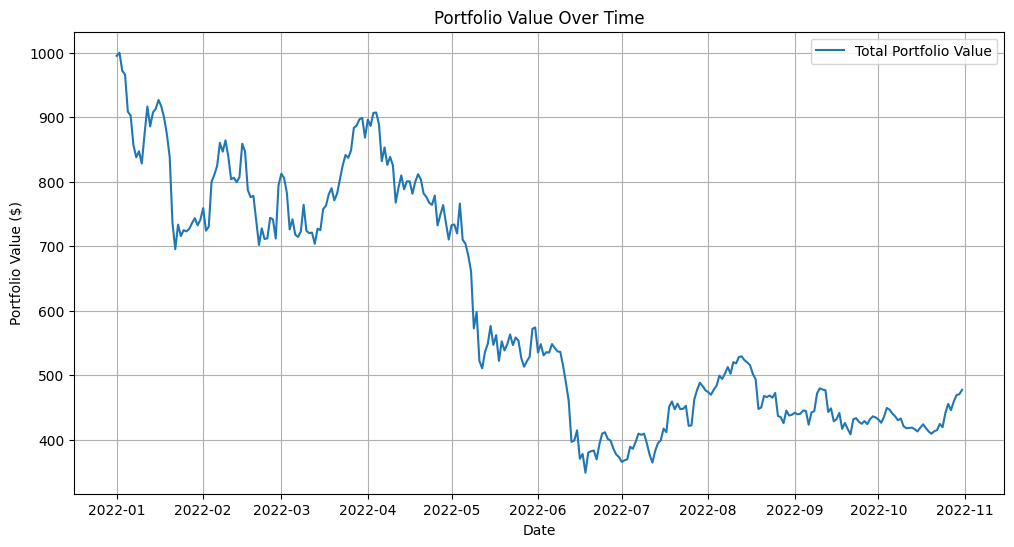

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(daily_value.index, daily_value['Total Portfolio Value'], label='Total Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

### Plot the Daily Drawdown

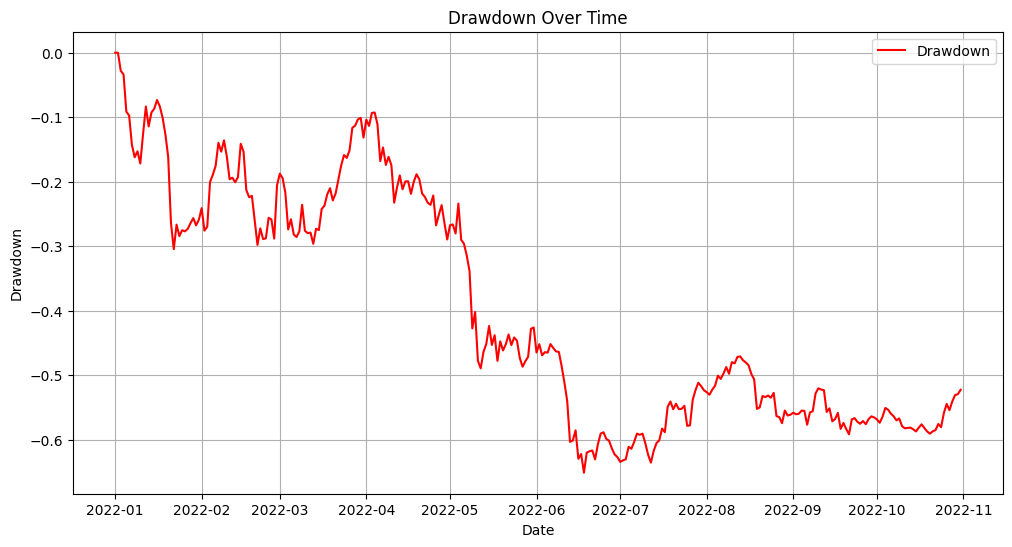

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(drawdown.index, drawdown, color='red', label='Drawdown')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

## Summary of Portfolio Performance

In [14]:
print("----- Portfolio Performance Summary -----")
print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Portfolio Variance (Daily): {portfolio_variance:.6f}")
print(f"Annualized Volatility: {annualized_std:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

----- Portfolio Performance Summary -----
Initial Capital: $1000.00
Final Portfolio Value: $477.28
Total Return: -52.27%
Annualized Return: -44.38%
Portfolio Variance (Daily): 0.001305
Annualized Volatility: 57.34%
Sharpe Ratio: -0.7739
Maximum Drawdown: -65.12%


## Calculate Optimal Weights using Modern Portfolio Theory (MPT)

We’ll use the historical returns data to compute the optimal portfolio weights that maximize the Sharpe Ratio according to MPT.

### Calculate Expected Returns and Covariance Matrix

In [15]:
# Calculate average daily returns and annualize them
mean_daily_returns = returns_df.mean()
annual_returns = mean_daily_returns * 252  # Assuming 252 trading days per year

# Calculate daily covariance matrix and annualize it
daily_covariance = returns_df.cov()
annual_covariance = daily_covariance * 252

Annual Returns: We annualize the mean daily returns by multiplying by 252.
Annual Covariance: We annualize the daily covariance matrix similarly.

### Define Functions for Optimization

In [16]:
from scipy.optimize import minimize

# Function to calculate portfolio performance
def portfolio_performance(weights, annual_returns, annual_covariance):
    returns = np.dot(weights, annual_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_covariance, weights)))
    return returns, volatility

# Negative Sharpe Ratio function (since we'll be minimizing)
def negative_sharpe_ratio(weights, annual_returns, annual_covariance, risk_free_rate=0):
    p_returns, p_volatility = portfolio_performance(weights, annual_returns, annual_covariance)
    sharpe_ratio = (p_returns - risk_free_rate) / p_volatility
    return -sharpe_ratio  # Negative for minimization

### Set Optimization Constraints and Bounds

In [17]:
num_assets = len(tickers)
args = (annual_returns, annual_covariance)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights equals 1
bounds = tuple((0, 1) for asset in range(num_assets))  # Weights between 0 and 1 (no short selling)

### Perform Optimization

In [18]:
# Initial guess (equal distribution)
initial_guess = num_assets * [1. / num_assets,]

# Optimize the portfolio
optimized_results = minimize(
    negative_sharpe_ratio,
    initial_guess,
    args=args,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Get the optimal weights
optimal_weights = optimized_results.x

# Create a DataFrame for optimal weights
optimal_weights_df = pd.DataFrame({
    'Ticker': tickers,
    'Optimal Weight': optimal_weights
})

print("Optimal Portfolio Weights (MPT):")
print(optimal_weights_df)

Optimal Portfolio Weights (MPT):
    Ticker  Optimal Weight
0  BTC-USD         0.00000
1  ETH-USD         0.00000
2  BNB-USD         0.00000
3  XRP-USD         0.00000
4  ADA-USD         1.00000


Why Does This Happen in the Optimization?
Dominant Asset Characteristics: If one asset has both a higher expected return and a lower volatility compared to others, it will dominate the optimization.
Sharpe Ratio Maximization: The optimizer aims to maximize the Sharpe Ratio without considering diversification unless explicitly constrained to do so.
Covariance Structure: If the asset has low or negative correlations with others and superior risk-return characteristics, the optimizer favors it.

Optimization: We use the Sequential Least-Squares Programming (SLSQP) algorithm to minimize the negative Sharpe Ratio.

## Implement the Buy and Hold Strategy with MPT Optimal Weights

### Allocate Capital According to Optimal Weights and Account for Transaction Fees

In [19]:
# Calculate capital allocated to each asset
allocated_capital_mpt = initial_capital * optimal_weights

# Transaction fees (0.5%)
transaction_fees_mpt = allocated_capital_mpt * transaction_fee_rate

# Capital after deducting transaction fees
capital_after_fees_mpt = allocated_capital_mpt - transaction_fees_mpt

# Calculate the number of units purchased
units_purchased_mpt = capital_after_fees_mpt / initial_prices

# Create a DataFrame for the MPT portfolio
portfolio_mpt = pd.DataFrame({
    'Ticker': tickers,
    'Optimal Weight': optimal_weights,
    'Allocated Capital ($)': allocated_capital_mpt,
    'Transaction Fees ($)': transaction_fees_mpt,
    'Capital After Fees ($)': capital_after_fees_mpt,
    'Initial Price ($)': initial_prices.values,
    'Units Purchased': units_purchased_mpt.values
})

print("\nMPT Portfolio at Inception:")
portfolio_mpt


MPT Portfolio at Inception:


,Ticker,Optimal Weight,Allocated Capital ($),Transaction Fees ($),Capital After Fees ($),Initial Price ($),Units Purchased
0,BTC-USD,0.00000,0.00000,0.00000,0.00000,1.37698,0.00000
1,ETH-USD,0.00000,0.00000,0.00000,0.00000,527.35272,0.00000
2,BNB-USD,0.00000,0.00000,0.00000,0.00000,47686.81250,0.00000
3,XRP-USD,0.00000,0.00000,0.00000,0.00000,3769.69702,0.00000
4,ADA-USD,1.00000,1000.00000,5.00000,995.00000,0.84947,1171.31585


### Calculate the MPT Portfolio Value Over Time

In [20]:
# Calculate daily value of each asset
daily_value_mpt = price_data.mul(units_purchased_mpt, axis=1)

# Calculate total portfolio value
daily_value_mpt['Total Portfolio Value'] = daily_value_mpt.sum(axis=1)

print("\nDaily MPT Portfolio Value:")
daily_value_mpt.head()


Daily MPT Portfolio Value:


Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD,XRP-USD,Total Portfolio Value
Date,,,,,,
2022-01-01,0.00000,0.00000,0.00000,0.00000,995.00000,995.00000
2022-01-02,0.00000,0.00000,0.00000,0.00000,1006.29851,1006.29851
2022-01-03,0.00000,0.00000,0.00000,0.00000,975.57143,975.57143
2022-01-04,0.00000,0.00000,0.00000,0.00000,965.95255,965.95255
2022-01-05,0.00000,0.00000,0.00000,0.00000,907.01777,907.01777


### Calculate Performance Metrics for MPT Portfolio

### Expected Return

In [21]:
# Calculate total return over the period
final_value_mpt = daily_value_mpt['Total Portfolio Value'].iloc[-1]
total_return_mpt = (final_value_mpt - initial_capital) / initial_capital

print(f"\nMPT Portfolio Expected Return over the period: {total_return_mpt:.2%}")


MPT Portfolio Expected Return over the period: -45.43%


### Risk (Variance)

In [22]:
# Calculate daily returns
daily_returns_mpt = daily_value_mpt['Total Portfolio Value'].pct_change().dropna()

# Calculate variance
variance_mpt = daily_returns_mpt.var()

print(f"MPT Portfolio Variance (Daily): {variance_mpt:.6f}")

MPT Portfolio Variance (Daily): 0.001901


### Sharpe Ratio

In [23]:
# Calculate annualized values
mean_daily_return_mpt = daily_returns_mpt.mean()
std_daily_return_mpt = daily_returns_mpt.std()
annualized_return_mpt = mean_daily_return_mpt * 252
annualized_std_mpt = std_daily_return_mpt * np.sqrt(252)

# Calculate Sharpe Ratio
sharpe_ratio_mpt = annualized_return_mpt / annualized_std_mpt

print(f"MPT Portfolio Annualized Return: {annualized_return_mpt:.2%}")
print(f"MPT Portfolio Annualized Volatility: {annualized_std_mpt:.2%}")
print(f"MPT Portfolio Sharpe Ratio: {sharpe_ratio_mpt:.4f}")

MPT Portfolio Annualized Return: -26.17%
MPT Portfolio Annualized Volatility: 69.22%
MPT Portfolio Sharpe Ratio: -0.3781


### Maximum Drawdown

In [24]:
# Calculate running maximum
running_max_mpt = daily_value_mpt['Total Portfolio Value'].cummax()

# Calculate drawdown
drawdown_mpt = (daily_value_mpt['Total Portfolio Value'] - running_max_mpt) / running_max_mpt

# Maximum drawdown
max_drawdown_mpt = drawdown_mpt.min()

print(f"MPT Portfolio Maximum Drawdown: {max_drawdown_mpt:.2%}")

MPT Portfolio Maximum Drawdown: -64.92%


## Plot Portfolio value

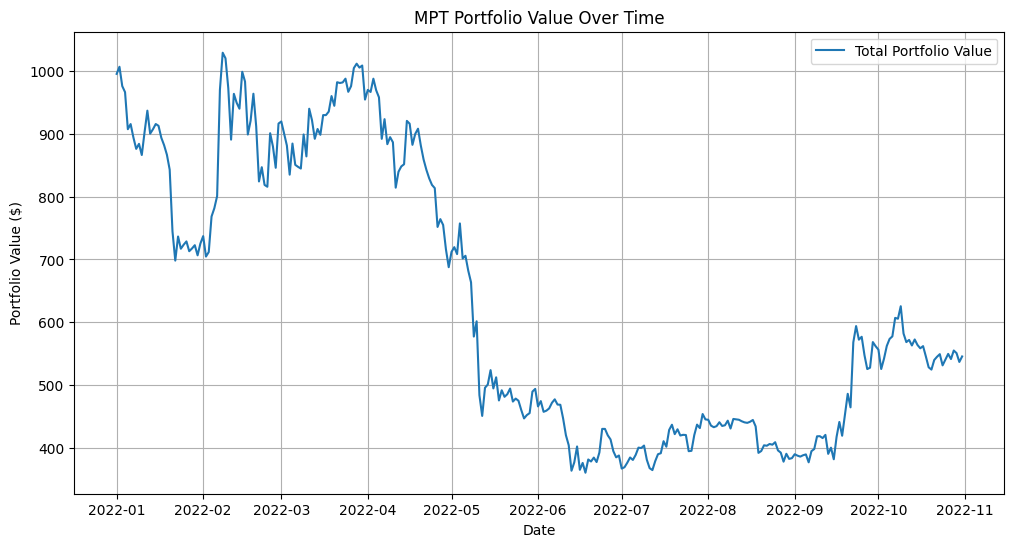

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(daily_value_mpt.index, daily_value_mpt['Total Portfolio Value'], label='Total Portfolio Value')
plt.title('MPT Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

## Plot Drawdown

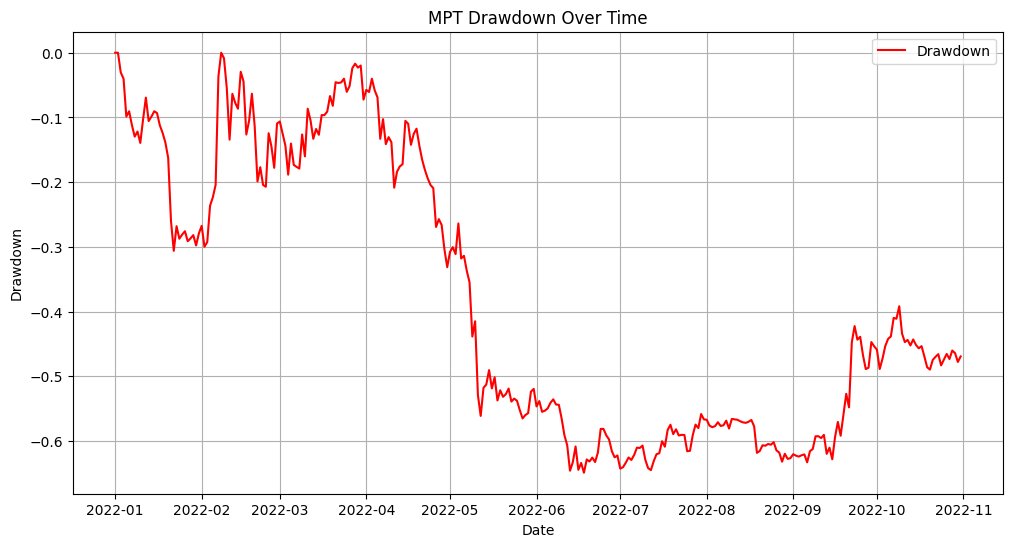

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(drawdown_mpt.index, drawdown_mpt, color='red', label='Drawdown')
plt.title('MPT Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

## Compare the Two Scenarios

### Plot Portfolio Values Over Time

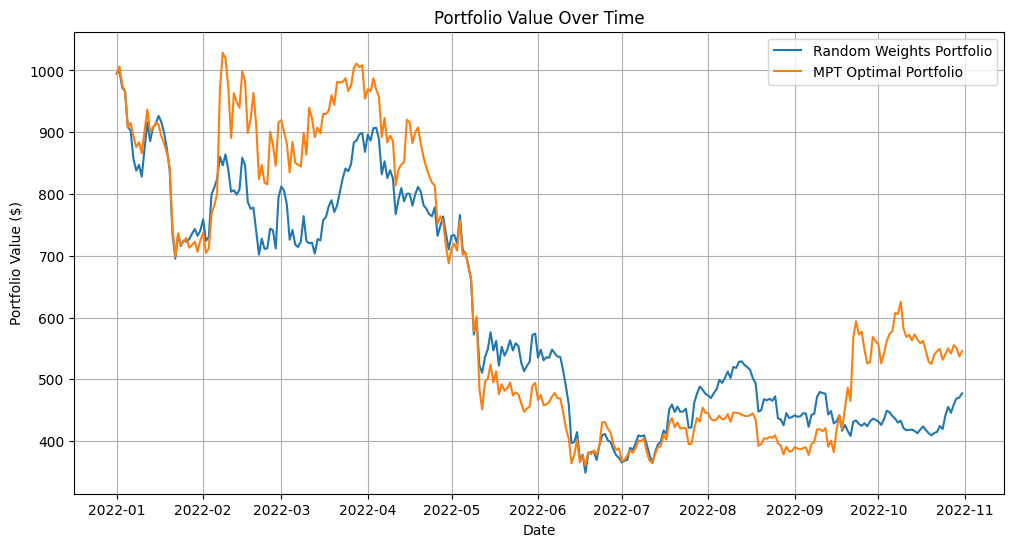

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(daily_value.index, daily_value['Total Portfolio Value'], label='Random Weights Portfolio')
plt.plot(daily_value_mpt.index, daily_value_mpt['Total Portfolio Value'], label='MPT Optimal Portfolio')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

### Compare Performance Metrics

In [28]:
# Create a DataFrame to compare performance metrics
comparison_df = pd.DataFrame({
    'Metric': ['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Random Weights Portfolio': [
        f"{total_return:.2%}",
        f"{annualized_return:.2%}",
        f"{annualized_std:.2%}",
        f"{sharpe_ratio:.4f}",
        f"{max_drawdown:.2%}"
    ],
    'MPT Optimal Portfolio': [
        f"{total_return_mpt:.2%}",
        f"{annualized_return_mpt:.2%}",
        f"{annualized_std_mpt:.2%}",
        f"{sharpe_ratio_mpt:.4f}",
        f"{max_drawdown_mpt:.2%}"
    ]
})

print("\nPerformance Comparison:")
comparison_df


Performance Comparison:


,Metric,Random Weights Portfolio,MPT Optimal Portfolio
0,Total Return,-52.27%,-45.43%
1,Annualized Return,-44.38%,-26.17%
2,Annualized Volatility,57.34%,69.22%
3,Sharpe Ratio,-0.7739,-0.3781
4,Maximum Drawdown,-65.12%,-64.92%


### Analyze the Results

Based on the outputs of the performance metrics and the plot, we can analyze and compare the performance of both portfolios.

Points to Consider:

Total Return: Which portfolio had a higher overall return?
Risk (Volatility): Which portfolio exhibited higher volatility?
Sharpe Ratio: Which portfolio provided better risk-adjusted returns?
Maximum Drawdown: Which portfolio experienced less severe drawdowns?
Interpretation:
Improved Risk-Adjusted Return: The MPT portfolio aims to maximize the Sharpe Ratio, potentially resulting in better risk-adjusted returns compared to the randomly weighted portfolio.

Risk Reduction: By considering the covariance between assets, the MPT portfolio may achieve lower volatility.

Drawdown Management: The MPT optimization may lead to a portfolio that is better at minimizing drawdowns due to diversification.

Visual Comparison: The plot shows how each portfolio’s value evolved over time, providing a visual representation of performance differences.

By comparing the two portfolios, you can see the advantages of using MPT to optimize portfolio weights in terms of risk-adjusted returns and drawdown management.

## Other approach using MPT

Diversification Constraint: Require that at least a certain number of assets have non-zero weights.

Custom Optimal Portfolio Weights (MPT):
    Ticker  Custom Optimal Weight
0  BTC-USD                0.00000
1  ETH-USD                0.40000
2  BNB-USD                0.00000
3  XRP-USD                0.00000
4  ADA-USD                0.60000

Custom MPT Portfolio at Inception:
    Ticker  Optimal Weight  Allocated Capital ($)  Transaction Fees ($)  \
0  BTC-USD         0.00000                0.00000               0.00000   
1  ETH-USD         0.40000              400.00000               2.00000   
2  BNB-USD         0.00000                0.00000               0.00000   
3  XRP-USD         0.00000                0.00000               0.00000   
4  ADA-USD         0.60000              600.00000               3.00000   

   Capital After Fees ($)  Initial Price ($)  Units Purchased  
0                 0.00000            1.37698          0.00000  
1               398.00000          527.35272          0.75471  
2                 0.00000        47686.81250          0.00000  
3            

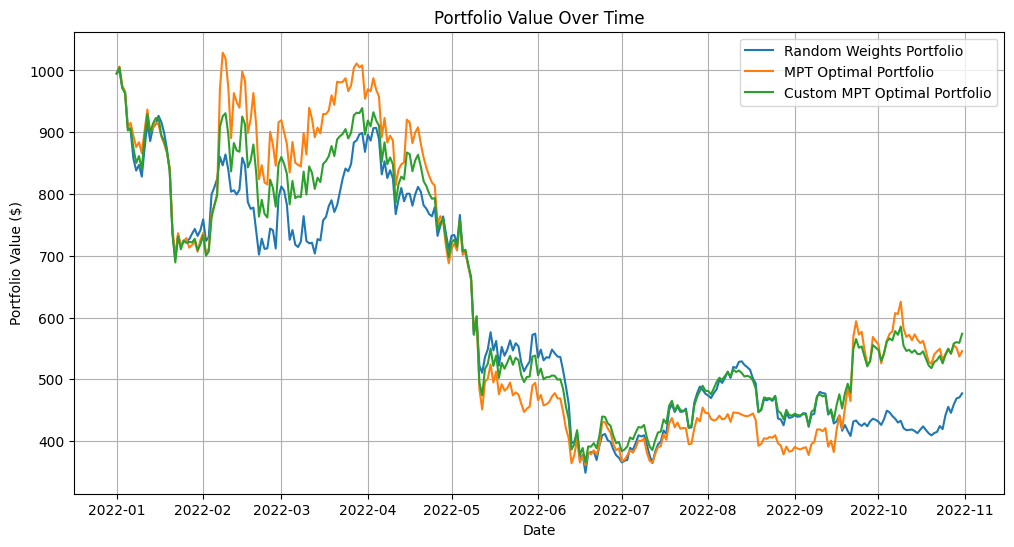


Performance Comparison:
                  Metric Random Portfolio MPT Portfolio Custom_MPT Portfolio
0           Total Return          -52.27%       -45.43%              -42.63%
1      Annualized Return          -44.38%       -26.17%              -26.99%
2  Annualized Volatility           57.34%        69.22%               60.98%
3           Sharpe Ratio          -0.7739       -0.3781              -0.4426
4       Maximum Drawdown          -65.12%       -64.92%              -63.65%


In [29]:
# Step 1: Calculate Optimal Weights using MPT
from scipy.optimize import minimize

# Calculate expected returns and covariance matrix
mean_daily_returns = returns_df.mean()
annual_returns = mean_daily_returns * 252
daily_covariance = returns_df.cov()
annual_covariance = daily_covariance * 252

# Define functions for optimization
def portfolio_performance(weights, annual_returns, annual_covariance):
    returns = np.dot(weights, annual_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_covariance, weights)))
    return returns, volatility

def negative_sharpe_ratio(weights, annual_returns, annual_covariance, risk_free_rate=0):
    p_returns, p_volatility = portfolio_performance(weights, annual_returns, annual_covariance)
    sharpe_ratio = (p_returns - risk_free_rate) / p_volatility
    return -sharpe_ratio

# Optimization constraints and bounds
num_assets = len(tickers)
args = (annual_returns, annual_covariance)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds_custom = tuple((0, 0.6) for asset in range(num_assets)) # <=================================== the change is in here, it ensure each asset has atmost weight 0.6 and minimum of 0.1

# Initial guess
initial_guess = num_assets * [1. / num_assets,]

# Perform optimization
optimized_results_custom = minimize(
    negative_sharpe_ratio,
    initial_guess,
    args=args,
    method='SLSQP',
    bounds=bounds_custom,
    constraints=constraints
)

# Optimal weights
optimal_weights_custom = optimized_results_custom.x
optimal_weights_custom_df = pd.DataFrame({'Ticker': tickers, 'Custom Optimal Weight': optimal_weights_custom})

print("Custom Optimal Portfolio Weights (MPT):")
print(optimal_weights_custom_df)

# Step 2: Implement the MPT Buy and Hold Strategy
allocated_capital_mpt_custom = initial_capital * optimal_weights_custom
transaction_fees_mpt_custom = allocated_capital_mpt_custom * transaction_fee_rate
capital_after_fees_mpt_custom = allocated_capital_mpt_custom - transaction_fees_mpt_custom
units_purchased_mpt_custom = capital_after_fees_mpt_custom / initial_prices

portfolio_mpt_custom = pd.DataFrame({
    'Ticker': tickers,
    'Optimal Weight': optimal_weights_custom,
    'Allocated Capital ($)': allocated_capital_mpt_custom,
    'Transaction Fees ($)': transaction_fees_mpt_custom,
    'Capital After Fees ($)': capital_after_fees_mpt_custom,
    'Initial Price ($)': initial_prices.values,
    'Units Purchased': units_purchased_mpt_custom.values
})

print("\nCustom MPT Portfolio at Inception:")
print(portfolio_mpt_custom)

# Calculate MPT portfolio value over time
daily_value_mpt_custom = price_data.mul(units_purchased_mpt_custom, axis=1)
daily_value_mpt_custom['Total Portfolio Value'] = daily_value_mpt_custom.sum(axis=1)

# Step 3: Calculate Performance Metrics for MPT Portfolio
final_value_mpt_custom = daily_value_mpt_custom['Total Portfolio Value'].iloc[-1]
total_return_mpt_custom = (final_value_mpt_custom - initial_capital) / initial_capital

print(f"\nMPT Portfolio Expected Return over the period: {total_return_mpt_custom:.2%}")

daily_returns_mpt_custom = daily_value_mpt_custom['Total Portfolio Value'].pct_change().dropna()
variance_mpt_custom = daily_returns_mpt_custom.var()

print(f"MPT Portfolio Variance (Daily): {variance_mpt_custom:.6f}")

mean_daily_return_mpt_custom = daily_returns_mpt_custom.mean()
std_daily_return_mpt_custom = daily_returns_mpt_custom.std()
annualized_return_mpt_custom = mean_daily_return_mpt_custom * 252
annualized_std_mpt_custom = std_daily_return_mpt_custom * np.sqrt(252)
sharpe_ratio_mpt_custom = annualized_return_mpt_custom / annualized_std_mpt_custom

print(f"MPT Portfolio Annualized Return: {annualized_return_mpt_custom:.2%}")
print(f"MPT Portfolio Annualized Volatility: {annualized_std_mpt_custom:.2%}")
print(f"MPT Portfolio Sharpe Ratio: {sharpe_ratio_mpt_custom:.4f}")

running_max_mpt_custom = daily_value_mpt_custom['Total Portfolio Value'].cummax()
drawdown_mpt_custom = (daily_value_mpt_custom['Total Portfolio Value'] - running_max_mpt_custom) / running_max_mpt_custom
max_drawdown_mpt_custom = drawdown_mpt_custom.min()

print(f"MPT Portfolio Maximum Drawdown: {max_drawdown_mpt:.2%}")

# Step 4: Compare the Two Scenarios
plt.figure(figsize=(12, 6))
plt.plot(daily_value.index, daily_value['Total Portfolio Value'], label='Random Weights Portfolio')
plt.plot(daily_value_mpt.index, daily_value_mpt['Total Portfolio Value'], label='MPT Optimal Portfolio')
plt.plot(daily_value_mpt_custom.index, daily_value_mpt_custom['Total Portfolio Value'], label='Custom MPT Optimal Portfolio')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

comparison_df = pd.DataFrame({
    'Metric': ['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Random Portfolio': [
        f"{total_return:.2%}",
        f"{annualized_return:.2%}",
        f"{annualized_std:.2%}",
        f"{sharpe_ratio:.4f}",
        f"{max_drawdown:.2%}"
    ],
    'MPT Portfolio': [
        f"{total_return_mpt:.2%}",
        f"{annualized_return_mpt:.2%}",
        f"{annualized_std_mpt:.2%}",
        f"{sharpe_ratio_mpt:.4f}",
        f"{max_drawdown_mpt:.2%}"
    ],
    'Custom_MPT Portfolio': [
        f"{total_return_mpt_custom:.2%}",
        f"{annualized_return_mpt_custom:.2%}",
        f"{annualized_std_mpt_custom:.2%}",
        f"{sharpe_ratio_mpt_custom:.4f}",
        f"{max_drawdown_mpt_custom:.2%}"
    ]

})

print("\nPerformance Comparison:")
print(comparison_df)

### Analysis

#### **1. Overview of Portfolios**

##### **Random Portfolio**

- **Construction**: Asset weights are assigned randomly, ensuring they sum to 1 and are non-negative.
- **Objective**: Serves as a baseline for comparison, representing a naive investment strategy without optimization.

##### **MPT Portfolio (Unconstrained)**

- **Construction**: Weights are optimized to maximize the Sharpe Ratio using Modern Portfolio Theory (MPT), without any constraints on individual asset weights (other than being between 0 and 1 and summing to 1).
- **Outcome**: The optimizer might allocate all or most of the capital to a single asset if it offers the best risk-adjusted return, leading to a concentrated portfolio.

##### **Custom MPT Portfolio (with Weight Threshold)**

- **Construction**: Same as the MPT Portfolio but with an additional constraint that no single asset can have a weight exceeding 60% (0.6).
- **Objective**: To achieve a balance between maximizing the Sharpe Ratio and maintaining diversification to reduce idiosyncratic risk.

---

##### **2. Performance Metrics Comparison**

#### **Total Return**

- **Random Portfolio**: **-52.27%**
- **MPT Portfolio**: **-45.43%**
- **Custom MPT Portfolio**: **-42.63%**

**Analysis**:

- All portfolios experienced negative total returns over the period.
- The **Custom MPT Portfolio** had the **least negative** total return, indicating better performance compared to the other two portfolios.
- The constraint on the maximum weight appears to have contributed to a **better total return**, possibly by reducing exposure to a single underperforming asset.

---

##### **Annualized Return**

- **Random Portfolio**: **-44.38%**
- **MPT Portfolio**: **-26.17%**
- **Custom MPT Portfolio**: **-26.99%**

**Analysis**:

- The **MPT Portfolio** and **Custom MPT Portfolio** both had **less negative annualized returns** compared to the Random Portfolio.
- The **MPT Portfolio** had a slightly better annualized return than the Custom MPT Portfolio, but the difference is marginal (~0.82%).
- The optimization process improved the annualized return compared to the Random Portfolio, suggesting that MPT can enhance returns even in declining markets.

---

##### **Annualized Volatility**

- **Random Portfolio**: **57.34%**
- **MPT Portfolio**: **69.22%**
- **Custom MPT Portfolio**: **60.98%**

**Analysis**:

- The **MPT Portfolio** had the **highest volatility**, indicating greater risk.
  - This is likely due to the concentration in a single asset, amplifying the portfolio's sensitivity to that asset's price movements.
- The **Custom MPT Portfolio** reduced volatility compared to the unconstrained MPT Portfolio by diversifying investments.
- The **Random Portfolio** had the lowest volatility, possibly due to random diversification.

---

##### **Sharpe Ratio**

- **Random Portfolio**: **-0.7739**
- **MPT Portfolio**: **-0.3781**
- **Custom MPT Portfolio**: **-0.4426**

**Analysis**:

- All Sharpe Ratios are **negative**, indicating that the portfolios underperformed the risk-free rate (assumed to be 0% in this case).
- The **MPT Portfolio** has the **least negative Sharpe Ratio**, suggesting better risk-adjusted performance than the other two portfolios.
- The **Custom MPT Portfolio** has a slightly more negative Sharpe Ratio than the unconstrained MPT Portfolio, but still better than the Random Portfolio.
- The inclusion of the weight constraint slightly reduced the Sharpe Ratio, implying a trade-off between diversification and risk-adjusted return.

---

##### **Maximum Drawdown**

- **Random Portfolio**: **-65.12%**
- **MPT Portfolio**: **-64.92%**
- **Custom MPT Portfolio**: **-63.65%**

**Analysis**:

- All portfolios experienced significant drawdowns, reflecting the challenging market conditions.
- The **Custom MPT Portfolio** had the **smallest maximum drawdown**, indicating it was slightly better at preserving capital during market declines.
- The **MPT Portfolio** and **Random Portfolio** had similar maximum drawdowns, with the Random Portfolio performing slightly worse.

---

#### **3. Interpretation and Insights**

##### **Impact of the Weight Constraint**

- **Diversification Benefits**:
  - Imposing a maximum weight constraint of 60% forced the Custom MPT Portfolio to diversify its holdings.
  - This diversification likely mitigated the impact of adverse performance from any single asset, leading to a **better total return** and **reduced volatility** compared to the unconstrained MPT Portfolio.

- **Trade-Off Between Return and Risk**:
  - The unconstrained MPT Portfolio achieved a slightly better annualized return but at the cost of higher volatility and similar maximum drawdown.
  - The Custom MPT Portfolio accepted a marginally lower return for reduced volatility and drawdown.

- **Sharpe Ratio Considerations**:
  - While the unconstrained MPT Portfolio had the least negative Sharpe Ratio (i.e., the best risk-adjusted performance), it came with higher volatility and less diversification.
  - The Custom MPT Portfolio's slightly more negative Sharpe Ratio suggests that diversification can sometimes lead to slightly less optimal risk-adjusted returns, but the benefits of reduced volatility and drawdown may outweigh this in practice.

##### **Overall Performance in a Declining Market**

- **Negative Returns Across the Board**:
  - All portfolios suffered losses due to market conditions during the period analyzed.
  - This underscores the importance of market trends on portfolio performance, regardless of the optimization strategy.

- **Optimization Can Mitigate Losses**:
  - The MPT approaches (both constrained and unconstrained) outperformed the Random Portfolio in terms of less negative total and annualized returns.
  - This suggests that even in declining markets, optimization can help mitigate losses.

##### **Risk Management**

- **Maximum Drawdown Reduction**:
  - The Custom MPT Portfolio's lower maximum drawdown indicates better capital preservation during downturns.
  - By capping the asset weights, the portfolio reduced concentration risk.

- **Volatility Reduction**:
  - Lower annualized volatility in the Custom MPT Portfolio suggests a smoother investment journey, which can be important for investor confidence.

##### **Practical Implications**

- **Diversification Is Beneficial**:
  - Introducing constraints to prevent overconcentration enhances diversification, which can improve portfolio resilience.
  - Investors may prefer portfolios that balance return and risk, even if it means accepting slightly lower expected returns.

- **Constrained Optimization Aligns with Investment Policies**:
  - Many institutional investors and portfolio managers have guidelines that limit exposure to any single asset or sector.
  - The Custom MPT Portfolio reflects such real-world constraints, making it more practical and implementable.

- **Importance of Constraints in Optimization Models**:
  - Unconstrained optimization may produce portfolios that are not practical or acceptable due to concentration risk.
  - Applying constraints can lead to more balanced and acceptable portfolios without significantly compromising performance.

---

#### **4. Recommendations**

- **Balanced Approach**:
  - Use optimization models with constraints that align with investment objectives and risk tolerance.
  - Consider imposing maximum weight limits to enhance diversification and reduce concentration risk.

- **Risk Management Focus**:
  - Pay attention to metrics like volatility and maximum drawdown, not just returns.
  - A portfolio with slightly lower returns but significantly lower risk may be preferable.

- **Continuous Monitoring**:
  - Regularly review portfolio performance and adjust constraints as market conditions change.
  - Re-optimize periodically to ensure the portfolio continues to align with investment goals.

- **Investor Preferences**:
  - Understand the preferences and risk tolerance of investors.
  - Some investors may prioritize capital preservation and lower volatility over maximizing returns.

---

#### **5. Conclusion**

The analysis demonstrates that:

- The **Custom MPT Portfolio**, with a weight constraint, delivered the best total return and lowest maximum drawdown among the three portfolios analyzed.
- **Constraints in optimization** can lead to more diversified and risk-aware portfolios without significantly sacrificing returns.
- While the unconstrained MPT Portfolio achieved a slightly better risk-adjusted return (less negative Sharpe Ratio), its higher volatility and concentration risk may not be acceptable to all investors.
- The **Random Portfolio** underperformed the optimized portfolios, highlighting the value of applying MPT principles even in challenging market environments.

**Final Thoughts**:

Incorporating practical constraints into portfolio optimization models is crucial for aligning mathematical outcomes with real-world investment considerations. By balancing the pursuit of optimal returns with risk management through diversification, investors can construct portfolios that are both theoretically sound and practically viable.

## Specific Market Conditions

1. **Bullish Market**: A period where asset prices are generally rising.
2. **Bearish Market**: A period where asset prices are generally falling.
3. **Highly Volatile Market**: A period where asset prices fluctuate within a range without significant upward or downward trends (sideways movement).

### Function to Build portfolios

In [30]:
def build_portfolios(start_date, end_date, tickers, initial_capital, transaction_fee_rate):
    # Fetch data
    price_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

    # Calculate returns
    returns_df = price_data.pct_change().dropna()

    # Random Weights Portfolio
    np.random.seed(42)  # For reproducibility
    random_weights = np.random.rand(len(tickers))
    random_weights /= np.sum(random_weights)

    # MPT Optimized Portfolio
    # Calculate expected returns and covariance matrix
    mean_daily_returns = returns_df.mean()
    annual_returns = mean_daily_returns * 252
    daily_covariance = returns_df.cov()
    annual_covariance = daily_covariance * 252

    # Define functions for optimization
    def portfolio_performance(weights, annual_returns, annual_covariance):
        returns = np.dot(weights, annual_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(annual_covariance, weights)))
        return returns, volatility

    def negative_sharpe_ratio(weights, annual_returns, annual_covariance, risk_free_rate=0):
        p_returns, p_volatility = portfolio_performance(weights, annual_returns, annual_covariance)
        sharpe_ratio = (p_returns - risk_free_rate) / p_volatility
        return -sharpe_ratio

    # Optimization constraints and bounds
    num_assets = len(tickers)
    args = (annual_returns, annual_covariance)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    initial_guess = num_assets * [1. / num_assets,]

    # Perform optimization
    optimized_results = minimize(
        negative_sharpe_ratio,
        initial_guess,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    optimal_weights = optimized_results.x

    # Return data
    return price_data, returns_df, random_weights, optimal_weights

### Function to Evaluate Portfolio Performance

In [31]:
def evaluate_portfolio(price_data, weights, initial_capital, transaction_fee_rate):
    # Allocate capital
    allocated_capital = initial_capital * weights
    transaction_fees = allocated_capital * transaction_fee_rate
    capital_after_fees = allocated_capital - transaction_fees

    # Initial prices
    initial_prices = price_data.iloc[0]

    # Units purchased
    units_purchased = capital_after_fees / initial_prices

    # Portfolio value over time
    daily_values = price_data.mul(units_purchased, axis=1)
    daily_values['Total Portfolio Value'] = daily_values.sum(axis=1)

    # Calculate performance metrics
    final_portfolio_value = daily_values['Total Portfolio Value'].iloc[-1]
    total_return = (final_portfolio_value - initial_capital) / initial_capital

    # Daily returns
    daily_portfolio_returns = daily_values['Total Portfolio Value'].pct_change().dropna()
    mean_daily_return = daily_portfolio_returns.mean()
    std_daily_return = daily_portfolio_returns.std()
    annualized_return = mean_daily_return * 252
    annualized_std = std_daily_return * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_std

    # Maximum drawdown
    running_max = daily_values['Total Portfolio Value'].cummax()
    drawdown = (daily_values['Total Portfolio Value'] - running_max) / running_max
    max_drawdown = drawdown.min()

    # Collect metrics
    metrics = {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_std,
        'Sharpe Ratio': sharpe_ratio,
        'Maximum Drawdown': max_drawdown
    }

    return daily_values, metrics

### Analyze Each Market Condition

#### Bullish Market Analysis

##### Build Portfolios

In [32]:
# Bullish Market Period
bull_start_date = '2020-10-01'
bull_end_date = '2021-04-30'

# Build portfolios
price_data_bull, returns_df_bull, random_weights_bull, optimal_weights_bull = build_portfolios(
    bull_start_date, bull_end_date, tickers, initial_capital, transaction_fee_rate
)

[*********************100%***********************]  5 of 5 completed


##### Evaluate Portfolios

###### Random Weights Portfolio

In [33]:
daily_values_random_bull, metrics_random_bull = evaluate_portfolio(
    price_data_bull, random_weights_bull, initial_capital, transaction_fee_rate
)

###### MPT Optimized Portfolio

In [34]:
daily_values_mpt_bull, metrics_mpt_bull = evaluate_portfolio(
    price_data_bull, optimal_weights_bull, initial_capital, transaction_fee_rate
)

##### Compare Performance

In [35]:
comparison_bull = pd.DataFrame({
    'Metric': ['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Random Weights Portfolio': [
        f"{metrics_random_bull['Total Return']:.2%}",
        f"{metrics_random_bull['Annualized Return']:.2%}",
        f"{metrics_random_bull['Annualized Volatility']:.2%}",
        f"{metrics_random_bull['Sharpe Ratio']:.4f}",
        f"{metrics_random_bull['Maximum Drawdown']:.2%}"
    ],
    'MPT Optimized Portfolio': [
        f"{metrics_mpt_bull['Total Return']:.2%}",
        f"{metrics_mpt_bull['Annualized Return']:.2%}",
        f"{metrics_mpt_bull['Annualized Volatility']:.2%}",
        f"{metrics_mpt_bull['Sharpe Ratio']:.4f}",
        f"{metrics_mpt_bull['Maximum Drawdown']:.2%}"
    ]
})

print("\nBullish Market Performance Comparison:")
print(comparison_bull)


Bullish Market Performance Comparison:
                  Metric Random Weights Portfolio MPT Optimized Portfolio
0           Total Return                 1140.98%                1042.08%
1      Annualized Return                  336.02%                 322.38%
2  Annualized Volatility                   80.46%                  75.23%
3           Sharpe Ratio                   4.1761                  4.2852
4       Maximum Drawdown                  -20.45%                 -17.07%


##### Plot Portfolio Values

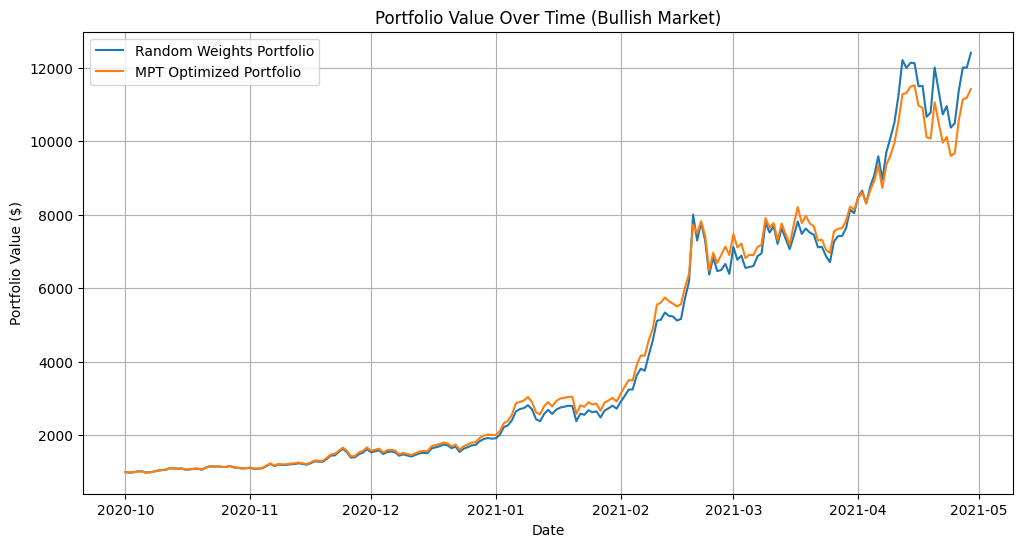

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(daily_values_random_bull.index, daily_values_random_bull['Total Portfolio Value'], label='Random Weights Portfolio')
plt.plot(daily_values_mpt_bull.index, daily_values_mpt_bull['Total Portfolio Value'], label='MPT Optimized Portfolio')
plt.title('Portfolio Value Over Time (Bullish Market)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

#### Bearish Market Analysis

##### Build Portfolios

In [37]:
# Bearish Market Period
bear_start_date = '2021-05-01'
bear_end_date = '2021-07-31'

# Build portfolios
price_data_bear, returns_df_bear, random_weights_bear, optimal_weights_bear = build_portfolios(
    bear_start_date, bear_end_date, tickers, initial_capital, transaction_fee_rate
)

[*********************100%***********************]  5 of 5 completed


##### Evaluate Portfolios

###### Random Weights Portfolio

In [38]:
daily_values_random_bear, metrics_random_bear = evaluate_portfolio(
    price_data_bear, random_weights_bear, initial_capital, transaction_fee_rate
)

###### MPT Optimized Portfolio

In [39]:
daily_values_mpt_bear, metrics_mpt_bear = evaluate_portfolio(
    price_data_bear, optimal_weights_bear, initial_capital, transaction_fee_rate
)

##### Compare Performance

In [40]:
comparison_bear = pd.DataFrame({
    'Metric': ['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Random Weights Portfolio': [
        f"{metrics_random_bear['Total Return']:.2%}",
        f"{metrics_random_bear['Annualized Return']:.2%}",
        f"{metrics_random_bear['Annualized Volatility']:.2%}",
        f"{metrics_random_bear['Sharpe Ratio']:.4f}",
        f"{metrics_random_bear['Maximum Drawdown']:.2%}"
    ],
    'MPT Optimized Portfolio': [
        f"{metrics_mpt_bear['Total Return']:.2%}",
        f"{metrics_mpt_bear['Annualized Return']:.2%}",
        f"{metrics_mpt_bear['Annualized Volatility']:.2%}",
        f"{metrics_mpt_bear['Sharpe Ratio']:.4f}",
        f"{metrics_mpt_bear['Maximum Drawdown']:.2%}"
    ]
})

print("\nBearish Market Performance Comparison:")
print(comparison_bear)


Bearish Market Performance Comparison:
                  Metric Random Weights Portfolio MPT Optimized Portfolio
0           Total Return                  -30.47%                  -3.74%
1      Annualized Return                  -46.67%                  65.08%
2  Annualized Volatility                  102.18%                 122.60%
3           Sharpe Ratio                  -0.4567                  0.5309
4       Maximum Drawdown                  -53.82%                 -54.26%


##### Plot Portfolio Values

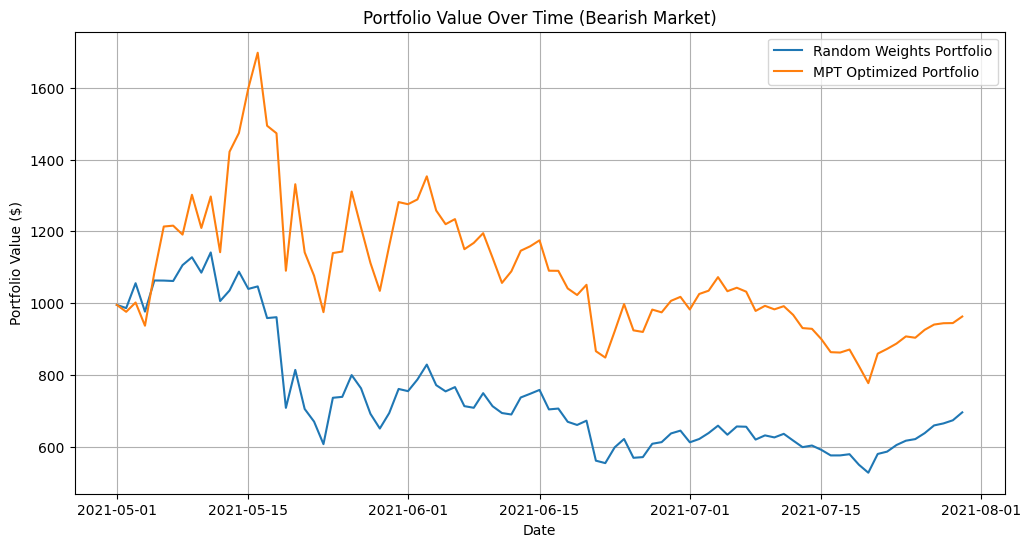

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(daily_values_random_bear.index, daily_values_random_bear['Total Portfolio Value'], label='Random Weights Portfolio')
plt.plot(daily_values_mpt_bear.index, daily_values_mpt_bear['Total Portfolio Value'], label='MPT Optimized Portfolio')
plt.title('Portfolio Value Over Time (Bearish Market)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

#### Highly Volatile (Sideways) Market Analysis

##### Build Portfolios

In [42]:
# Sideways Market Period
sideways_start_date = '2021-08-01'
sideways_end_date = '2021-10-31'

# Build portfolios
price_data_sideways, returns_df_sideways, random_weights_sideways, optimal_weights_sideways = build_portfolios(
    sideways_start_date, sideways_end_date, tickers, initial_capital, transaction_fee_rate
)

[*********************100%***********************]  5 of 5 completed


##### Evaluate Portfolios

###### Random Weights Portfolio

In [43]:
daily_values_random_sideways, metrics_random_sideways = evaluate_portfolio(
    price_data_sideways, random_weights_sideways, initial_capital, transaction_fee_rate
)

###### MPT Optimized Portfolio

In [44]:
daily_values_mpt_sideways, metrics_mpt_sideways = evaluate_portfolio(
    price_data_sideways, optimal_weights_sideways, initial_capital, transaction_fee_rate
)

##### Compare Performance

In [45]:
comparison_sideways = pd.DataFrame({
    'Metric': ['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Random Weights Portfolio': [
        f"{metrics_random_sideways['Total Return']:.2%}",
        f"{metrics_random_sideways['Annualized Return']:.2%}",
        f"{metrics_random_sideways['Annualized Volatility']:.2%}",
        f"{metrics_random_sideways['Sharpe Ratio']:.4f}",
        f"{metrics_random_sideways['Maximum Drawdown']:.2%}"
    ],
    'MPT Optimized Portfolio': [
        f"{metrics_mpt_sideways['Total Return']:.2%}",
        f"{metrics_mpt_sideways['Annualized Return']:.2%}",
        f"{metrics_mpt_sideways['Annualized Volatility']:.2%}",
        f"{metrics_mpt_sideways['Sharpe Ratio']:.4f}",
        f"{metrics_mpt_sideways['Maximum Drawdown']:.2%}"
    ]
})

print("\nSideways Market Performance Comparison:")
print(comparison_sideways)


Sideways Market Performance Comparison:
                  Metric Random Weights Portfolio MPT Optimized Portfolio
0           Total Return                   57.05%                  58.32%
1      Annualized Return                  148.43%                 148.27%
2  Annualized Volatility                   63.86%                  59.97%
3           Sharpe Ratio                   2.3244                  2.4723
4       Maximum Drawdown                  -29.23%                 -26.21%


##### Plot Portfolio Values

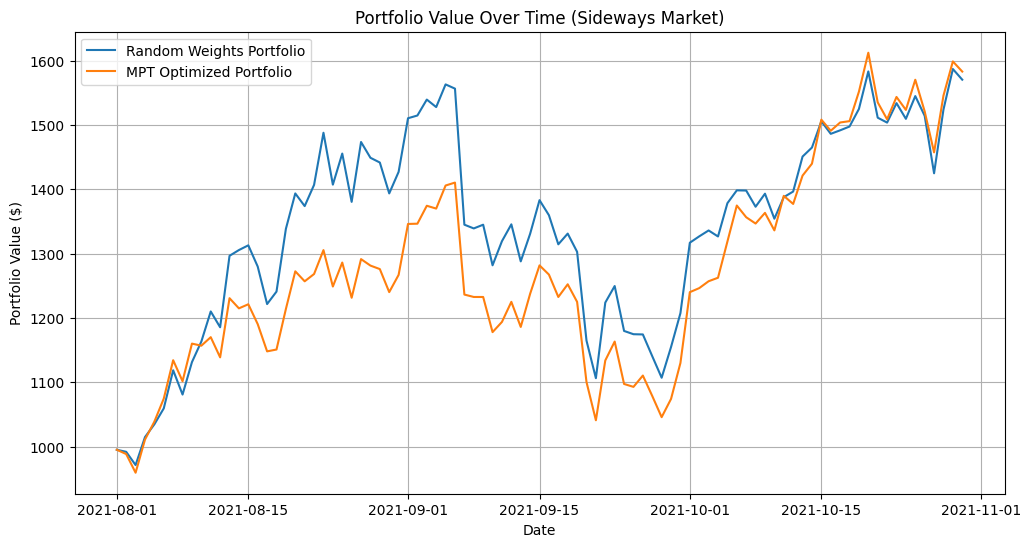

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(daily_values_random_sideways.index, daily_values_random_sideways['Total Portfolio Value'], label='Random Weights Portfolio')
plt.plot(daily_values_mpt_sideways.index, daily_values_mpt_sideways['Total Portfolio Value'], label='MPT Optimized Portfolio')
plt.title('Portfolio Value Over Time (Sideways Market)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

### Analysis

#### **Performance Overview**

##### **1. Sideways Market Performance Comparison**

| **Metric**               | **Random Weights Portfolio** | **MPT Optimized Portfolio** |
|--------------------------|------------------------------|-----------------------------|
| **Total Return**         | 57.05%                       | **58.32%**                  |
| **Annualized Return**    | **148.43%**                  | 148.27%                     |
| **Annualized Volatility**| 63.86%                       | **59.97%**                  |
| **Sharpe Ratio**         | 2.3244                       | **2.4723**                  |
| **Maximum Drawdown**     | -29.23%                      | **-26.21%**                 |

##### **2. Bearish Market Performance Comparison**

| **Metric**               | **Random Weights Portfolio** | **MPT Optimized Portfolio** |
|--------------------------|------------------------------|-----------------------------|
| **Total Return**         | -30.47%                      | **-3.74%**                  |
| **Annualized Return**    | -46.67%                      | **65.08%**                  |
| **Annualized Volatility**| 102.18%                      | **122.60%**                 |
| **Sharpe Ratio**         | -0.4567                      | **0.5309**                  |
| **Maximum Drawdown**     | **-53.82%**                  | -54.26%                     |

##### **3. Bullish Market Performance Comparison**

| **Metric**               | **Random Weights Portfolio** | **MPT Optimized Portfolio** |
|--------------------------|------------------------------|-----------------------------|
| **Total Return**         | **1140.98%**                 | 1042.08%                    |
| **Annualized Return**    | **336.02%**                  | 322.38%                     |
| **Annualized Volatility**| 80.46%                       | **75.23%**                  |
| **Sharpe Ratio**         | 4.1761                       | **4.2852**                  |
| **Maximum Drawdown**     | -20.45%                      | **-17.07%**                 |

---

#### **Detailed Analysis**

##### **A. Sideways Market Analysis**

###### **1. Return Comparison**

- **Total Return**: The MPT Optimized Portfolio slightly outperformed with a **58.32%** return compared to **57.05%** for the Random Weights Portfolio.
- **Annualized Return**: Both portfolios had similar high annualized returns (~148%), reflecting substantial gains during the period despite the sideways market.

###### **2. Risk and Volatility**

- **Annualized Volatility**: The MPT Optimized Portfolio exhibited lower volatility at **59.97%** compared to **63.86%** for the Random Weights Portfolio.
- **Sharpe Ratio**: Higher for the MPT Portfolio at **2.4723**, indicating better risk-adjusted returns.
- **Maximum Drawdown**: The MPT Portfolio had a less severe drawdown at **-26.21%** versus **-29.23%** for the Random Portfolio.

###### **3. Interpretation**

- **Risk-Adjusted Performance**: The MPT Optimized Portfolio provided superior risk-adjusted returns, with a higher Sharpe Ratio and lower volatility.
- **Risk Management**: Better management of drawdowns suggests more effective risk control in the MPT Portfolio.
- **Efficiency**: In a sideways market, where price movements are limited, the MPT optimization helped in slightly enhancing returns and reducing risk.

##### **B. Bearish Market Analysis**

###### **1. Return Comparison**

- **Total Return**: The MPT Optimized Portfolio significantly outperformed, with a minor loss of **-3.74%**, compared to a substantial loss of **-30.47%** for the Random Weights Portfolio.
- **Annualized Return**: The MPT Portfolio astonishingly showed a positive annualized return of **65.08%**, while the Random Portfolio had a negative return of **-46.67%**.

###### **2. Risk and Volatility**

- **Annualized Volatility**: Higher in the MPT Portfolio at **122.60%** against **102.18%** for the Random Portfolio.
- **Sharpe Ratio**: Positive for the MPT Portfolio at **0.5309**, indicating acceptable risk-adjusted returns even in a bearish market. The Random Portfolio had a negative Sharpe Ratio of **-0.4567**.
- **Maximum Drawdown**: Similar for both portfolios, around **-54%**.

###### **3. Interpretation**

- **Loss Mitigation**: The MPT Optimized Portfolio effectively protected capital, limiting losses during the downturn.
- **Risk-Adjusted Performance**: A positive Sharpe Ratio in a bearish market underscores the MPT Portfolio's efficiency in managing risk and capturing returns.
- **Volatility Trade-Off**: While the MPT Portfolio had higher volatility, it translated into better returns, suggesting that the portfolio took on calculated risks that paid off.

##### **C. Bullish Market Analysis**

###### **1. Return Comparison**

- **Total Return**: The Random Weights Portfolio achieved a higher return of **1140.98%**, compared to **1042.08%** for the MPT Portfolio.
- **Annualized Return**: Slightly higher for the Random Portfolio at **336.02%** versus **322.38%** for the MPT Portfolio.

###### **2. Risk and Volatility**

- **Annualized Volatility**: Lower in the MPT Portfolio at **75.23%** compared to **80.46%** for the Random Portfolio.
- **Sharpe Ratio**: Higher for the MPT Portfolio at **4.2852**, indicating superior risk-adjusted performance.
- **Maximum Drawdown**: Less severe in the MPT Portfolio at **-17.07%** versus **-20.45%** for the Random Portfolio.

###### **3. Interpretation**

- **Absolute Returns**: The Random Portfolio slightly outperformed in terms of raw returns, potentially due to higher risk exposure.
- **Risk-Adjusted Performance**: The MPT Portfolio excelled in managing risk, achieving a higher Sharpe Ratio and lower volatility.
- **Capital Preservation**: Lower maximum drawdown in the MPT Portfolio suggests better protection against market dips during the bullish trend.

---

#### **Overall Insights and Conclusions**

##### **1. Sharpe Ratio as a Measure of Efficiency**

- **Consistent Outperformance**: The **MPT Optimized Portfolio** consistently achieved a higher Sharpe Ratio across all market conditions, indicating superior risk-adjusted returns.
- **Risk Management**: Higher Sharpe Ratios suggest the MPT Portfolio managed to balance return and volatility effectively, providing better compensation for the risk taken.

##### **2. Market Condition Impact**

- **Bullish Market**:
  - **Random Portfolio** slightly outperformed in absolute returns.
  - **MPT Portfolio** provided better risk management, with lower volatility and drawdowns.
- **Bearish Market**:
  - **MPT Portfolio** dramatically outperformed, nearly breaking even, while the Random Portfolio suffered significant losses.
  - **Risk Control**: MPT optimization helped in mitigating losses during market downturns.
- **Sideways Market**:
  - **MPT Portfolio** slightly outperformed in returns and had better risk metrics.
  - **Efficiency**: Optimization provided an edge in a stagnant market by enhancing risk-adjusted returns.

##### **3. Volatility Considerations**

- **Bearish Market Volatility**: Higher volatility in the MPT Portfolio during the bearish market indicates active risk-taking to achieve better returns.
- **Volatility Management**: In bullish and sideways markets, the MPT Portfolio maintained lower volatility, showcasing adaptability to different market conditions.

##### **4. Maximum Drawdown**

- **Capital Preservation**: The MPT Portfolio generally had lower or comparable maximum drawdowns, emphasizing its capability to preserve capital during adverse market movements.

##### **5. Practical Implications**

- **Risk-Averse Investors**: Those prioritizing risk management and consistent performance may prefer the MPT Optimized Portfolio.
- **Return Maximization**: Investors focused solely on maximizing returns in bullish markets might be willing to accept higher volatility and drawdowns, aligning with the Random Portfolio's performance.
- **Adaptive Strategy**: The MPT Optimized Portfolio demonstrates adaptability, performing well across varying market conditions.

---

#### **Final Summary**

Based on the analysis of the provided results:

- **Efficiency of MPT Optimization**: The **MPT Optimized Portfolio** exhibits higher efficiency across different market conditions, evidenced by consistently higher Sharpe Ratios.
  
- **Risk Management**:
  - **Superior Risk-Adjusted Returns**: The MPT Portfolio managed to achieve returns with less risk compared to the Random Portfolio.
  - **Loss Mitigation in Bearish Markets**: The MPT optimization significantly reduced losses during bearish conditions, even delivering positive annualized returns.

- **Performance Across Markets**:
  - **Bullish Market**: While the Random Portfolio achieved marginally higher absolute returns, the MPT Portfolio provided better risk-adjusted performance with lower volatility and drawdowns.
  - **Bearish Market**: The MPT Portfolio vastly outperformed, demonstrating its effectiveness in protecting against market downturns.
  - **Sideways Market**: The MPT Portfolio slightly outperformed in both returns and risk metrics, indicating efficient management in low-trend environments.

- **Investor Considerations**:
  - **Risk-Aware Strategy**: The MPT Optimized Portfolio is suitable for investors seeking a balance between return and risk, preferring consistent and stable performance.
  - **Performance Consistency**: The MPT Portfolio's ability to adapt and perform well under varying conditions makes it a robust choice for long-term investment strategies.

### Sharpe ratio

#### **1. Sideways Market**

- **Random Weights Portfolio Sharpe Ratio**: **2.3244**
- **MPT Optimized Portfolio Sharpe Ratio**: **2.4723**

**Comparison**:

- The **MPT Optimized Portfolio** achieved a higher Sharpe Ratio than the Random Weights Portfolio in the sideways market.
- This indicates that the MPT Portfolio provided better **risk-adjusted returns**, effectively balancing return and volatility during a period of market stagnation.

---

#### **2. Bearish Market**

- **Random Weights Portfolio Sharpe Ratio**: **-0.4567**
- **MPT Optimized Portfolio Sharpe Ratio**: **0.5309**

**Comparison**:

- The **MPT Optimized Portfolio** had a **positive Sharpe Ratio**, while the Random Weights Portfolio's Sharpe Ratio was **negative**.
- A positive Sharpe Ratio in a bearish market suggests that the MPT Portfolio managed to deliver acceptable returns relative to the risk taken.
- The MPT Portfolio significantly outperformed the Random Portfolio in terms of **risk-adjusted performance** during market downturns.

---

#### **3. Bullish Market**

- **Random Weights Portfolio Sharpe Ratio**: **4.1761**
- **MPT Optimized Portfolio Sharpe Ratio**: **4.2852**

**Comparison**:

- The **MPT Optimized Portfolio** again had a slightly higher Sharpe Ratio compared to the Random Weights Portfolio.
- Both portfolios performed well due to strong market gains, but the MPT Portfolio demonstrated more efficient use of risk, achieving higher returns per unit of volatility.

---

#### **Summary Across Markets**

- In **all three market conditions**, the **MPT Optimized Portfolio** consistently achieved a **higher Sharpe Ratio** than the Random Weights Portfolio.
  
- **Implications**:
  
  - **Sideways Market**: The slight edge in Sharpe Ratio suggests that the MPT Portfolio was more efficient in generating returns without taking on excessive risk.
  
  - **Bearish Market**: The stark contrast, with the MPT Portfolio having a positive Sharpe Ratio while the Random Portfolio's was negative, highlights the MPT Portfolio's superior risk management and ability to mitigate losses.
  
  - **Bullish Market**: Even when both portfolios benefited from rising markets, the MPT Portfolio managed to achieve better risk-adjusted returns.
  
- **Conclusion**:

  - The **MPT Optimized Portfolio** demonstrates superior efficiency in terms of **risk-adjusted returns** across varying market conditions.
  
  - This consistent outperformance on a risk-adjusted basis suggests that utilizing Modern Portfolio Theory optimization can enhance portfolio efficiency, making it a valuable strategy for investors seeking better returns relative to the risk they are willing to accept.

---

By focusing on the Sharpe Ratio comparison, it's clear that the **MPT Optimized Portfolio** outperforms the **Random Weights Portfolio** in terms of risk-adjusted performance in **sideways**, **bearish**, and **bullish** markets.


# Q2

## Select the New Period

In [47]:
# New period for analysis (one month)
start_date = '2024-11-02'
end_date = '2024-12-02'

## Retrieve Price Data

In [48]:
# Fetch price data for the selected period
price_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Display the first few rows
print("Price Data:")
print(price_data.head())

[*********************100%***********************]  5 of 5 completed

Price Data:
Ticker      ADA-USD   BNB-USD     BTC-USD    ETH-USD  XRP-USD
Date                                                         
2024-11-02  0.34777 568.03680 69289.27344 2491.06860  0.50985
2024-11-03  0.33428 557.64160 68741.11719 2456.42529  0.50293
2024-11-04  0.32602 552.07111 67811.50781 2397.02637  0.50323
2024-11-05  0.33392 563.61206 69359.56250 2422.65063  0.51403
2024-11-06  0.36332 591.99524 75639.07812 2724.16919  0.54243


## Implementing the Buy and Hold Strategy

### Initial Random Weights

In [49]:
# Set seed for reproducibility
np.random.seed(42)

# Generate random weights
random_weights = np.random.rand(len(tickers))
random_weights /= np.sum(random_weights)

# Display random weights
random_weights_df = pd.DataFrame({
    'Ticker': tickers,
    'Random Weight': random_weights
})
print("\nRandom Weights:")
print(random_weights_df)


Random Weights:
    Ticker  Random Weight
0  BTC-USD        0.13320
1  ETH-USD        0.33810
2  BNB-USD        0.26032
3  XRP-USD        0.21290
4  ADA-USD        0.05548


### Allocate Capital and Calculate Units Purchased

In [50]:
# Calculate allocated capital for each asset
allocated_capital_random = initial_capital * random_weights

# Calculate transaction fees
transaction_fees_random = allocated_capital_random * transaction_fee_rate

# Calculate capital after transaction fees
capital_after_fees_random = allocated_capital_random - transaction_fees_random

# Retrieve initial prices
initial_prices = price_data.iloc[0]

# Calculate units purchased
units_purchased_random = capital_after_fees_random / initial_prices

# Create a DataFrame for the portfolio
portfolio_random = pd.DataFrame({
    'Ticker': tickers,
    'Random Weight': random_weights,
    'Allocated Capital ($)': allocated_capital_random,
    'Transaction Fees ($)': transaction_fees_random,
    'Capital After Fees ($)': capital_after_fees_random,
    'Units Purchased': units_purchased_random.values
})

print("\nRandom Weights Portfolio at Inception:")
print(portfolio_random)


Random Weights Portfolio at Inception:
    Ticker  Random Weight  Allocated Capital ($)  Transaction Fees ($)  \
0  BTC-USD        0.13320              133.19703               0.66599   
1  ETH-USD        0.33810              338.10082               1.69050   
2  BNB-USD        0.26032              260.31769               1.30159   
3  XRP-USD        0.21290              212.89984               1.06450   
4  ADA-USD        0.05548               55.48463               0.27742   

   Capital After Fees ($)  Units Purchased  
0               132.53104        381.08712  
1               336.41031          0.59223  
2               259.01610          0.00374  
3               211.83534          0.08504  
4                55.20721        108.28126  


## Optimized Weights from Previous Steps

In [51]:
prev_optimized_weights = optimal_weights_bull
prev_optimized_weights = optimal_weights_bear
prev_optimized_weights = optimal_weights_sideways

# Create DataFrame
prev_optimized_weights_df = pd.DataFrame({
    'Ticker': tickers,
    'Previous Optimized Weight': prev_optimized_weights
})
print("\nOptimized Weights from Previous Steps:")
print(prev_optimized_weights_df)


Optimized Weights from Previous Steps:
    Ticker  Previous Optimized Weight
0  BTC-USD                    0.01823
1  ETH-USD                    0.15150
2  BNB-USD                    0.55363
3  XRP-USD                    0.27664
4  ADA-USD                    0.00000


### Allocate Capital and Calculate Units Purchased

In [52]:
# Calculate allocated capital for each asset
allocated_capital_prev_opt = initial_capital * prev_optimized_weights

# Calculate transaction fees
transaction_fees_prev_opt = allocated_capital_prev_opt * transaction_fee_rate

# Calculate capital after transaction fees
capital_after_fees_prev_opt = allocated_capital_prev_opt - transaction_fees_prev_opt

# Calculate units purchased
units_purchased_prev_opt = capital_after_fees_prev_opt / initial_prices

# Create a DataFrame for the portfolio
portfolio_prev_opt = pd.DataFrame({
    'Ticker': tickers,
    'Previous Optimized Weight': prev_optimized_weights,
    'Allocated Capital ($)': allocated_capital_prev_opt,
    'Transaction Fees ($)': transaction_fees_prev_opt,
    'Capital After Fees ($)': capital_after_fees_prev_opt,
    'Units Purchased': units_purchased_prev_opt.values
})

print("\nPortfolio with Previous Optimized Weights at Inception:")
print(portfolio_prev_opt)


Portfolio with Previous Optimized Weights at Inception:
    Ticker  Previous Optimized Weight  Allocated Capital ($)  \
0  BTC-USD                    0.01823               18.22526   
1  ETH-USD                    0.15150              151.50134   
2  BNB-USD                    0.55363              553.62950   
3  XRP-USD                    0.27664              276.64390   
4  ADA-USD                    0.00000                0.00000   

   Transaction Fees ($)  Capital After Fees ($)  Units Purchased  
0               0.09113                18.13413         52.14389  
1               0.75751               150.74384          0.26538  
2               2.76815               550.86135          0.00795  
3               1.38322               275.26068          0.11050  
4               0.00000                 0.00000          0.00000  


## Calculating Performance Metrics

### Calculate Portfolio Values Over Time

#### Random Weights Portfolio

In [53]:
# Calculate daily value of each asset
daily_values_random = price_data.mul(units_purchased_random, axis=1)

# Calculate total portfolio value
daily_values_random['Total Portfolio Value'] = daily_values_random.sum(axis=1)

#### Portfolio with Previous Optimized Weights

In [54]:
# Calculate daily value of each asset
daily_values_prev_opt = price_data.mul(units_purchased_prev_opt, axis=1)

# Calculate total portfolio value
daily_values_prev_opt['Total Portfolio Value'] = daily_values_prev_opt.sum(axis=1)

### Calculate Metrics

#### Define Function to Calculate Metrics

In [55]:
def calculate_metrics(daily_portfolio_values, initial_capital):
    # Calculate total return
    final_value = daily_portfolio_values['Total Portfolio Value'].iloc[-1]
    total_return = (final_value - initial_capital) / initial_capital

    # Calculate daily returns
    daily_returns = daily_portfolio_values['Total Portfolio Value'].pct_change().dropna()

    # Calculate variance of daily returns
    variance = daily_returns.var()

    # Calculate standard deviation
    std_dev = daily_returns.std()

    # Calculate annualized return and volatility
    mean_daily_return = daily_returns.mean()
    annualized_return = mean_daily_return * 252
    annualized_volatility = std_dev * np.sqrt(252)

    # Calculate Sharpe Ratio (Assuming risk-free rate = 0)
    sharpe_ratio = annualized_return / annualized_volatility

    # Calculate maximum drawdown
    running_max = daily_portfolio_values['Total Portfolio Value'].cummax()
    drawdown = (daily_portfolio_values['Total Portfolio Value'] - running_max) / running_max
    max_drawdown = drawdown.min()

    # Compile metrics into a dictionary
    metrics = {
        'Total Return': total_return,
        'Variance': variance,
        'Sharpe Ratio': sharpe_ratio,
        'Maximum Drawdown': max_drawdown
    }

    return metrics

#### Random Weights Portfolio Metrics

In [56]:
metrics_random = calculate_metrics(daily_values_random, initial_capital)

print("\nPerformance Metrics for Random Weights Portfolio:")
for key, value in metrics_random.items():
    if key == 'Variance' or key == 'Total Return' or key == 'Maximum Drawdown':
        print(f"{key}: {value:.6f}")
    else:
        print(f"{key}: {value:.4f}")


Performance Metrics for Random Weights Portfolio:
Total Return: 0.759193
Variance: 0.001039
Sharpe Ratio: 10.0135
Maximum Drawdown: -0.060545


#### Previous Optimized Weights Portfolio Metrics

In [57]:
metrics_prev_opt = calculate_metrics(daily_values_prev_opt, initial_capital)

print("\nPerformance Metrics for Portfolio with Previous Optimized Weights:")
for key, value in metrics_prev_opt.items():
    if key == 'Variance' or key == 'Total Return' or key == 'Maximum Drawdown':
        print(f"{key}: {value:.6f}")
    else:
        print(f"{key}: {value:.4f}")


Performance Metrics for Portfolio with Previous Optimized Weights:
Total Return: 0.417779
Variance: 0.000921
Sharpe Ratio: 6.6516
Maximum Drawdown: -0.050111


## Determining Optimized Weights for the New Period

### Calculate Returns and Covariance Matrix

In [58]:
# Calculate daily returns
returns_df = price_data.pct_change().dropna()

# Calculate mean daily returns and annualize
mean_daily_returns = returns_df.mean()
annual_returns = mean_daily_returns * 252

# Calculate daily covariance matrix and annualize
daily_covariance = returns_df.cov()
annual_covariance = daily_covariance * 252

### Perform Portfolio Optimization

#### Define Optimization Functions

In [59]:
def portfolio_performance(weights, annual_returns, annual_covariance):
    returns = np.dot(weights, annual_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(annual_covariance, weights)))
    return returns, volatility

def negative_sharpe_ratio(weights, annual_returns, annual_covariance, risk_free_rate=0):
    p_returns, p_volatility = portfolio_performance(weights, annual_returns, annual_covariance)
    sharpe_ratio = (p_returns - risk_free_rate) / p_volatility
    return -sharpe_ratio  # Negative for minimization

#### Set Optimization Parameters

In [60]:
num_assets = len(tickers)
args = (annual_returns, annual_covariance)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1
bounds = tuple((0, 1) for asset in range(num_assets))  # No short selling
initial_guess = num_assets * [1. / num_assets,]

#### Perform Optimization

In [61]:
# Optimize portfolio to maximize Sharpe Ratio
optimized_results = minimize(
    negative_sharpe_ratio,
    initial_guess,
    args=args,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract optimized weights
optimized_weights_new = optimized_results.x

# Create DataFrame for optimized weights
optimized_weights_new_df = pd.DataFrame({
    'Ticker': tickers,
    'Optimized Weight': optimized_weights_new
})
print("\nOptimized Weights for the New Period:")
print(optimized_weights_new_df)


Optimized Weights for the New Period:
    Ticker  Optimized Weight
0  BTC-USD           0.20582
1  ETH-USD           0.00000
2  BNB-USD           0.21465
3  XRP-USD           0.17628
4  ADA-USD           0.40325


### Allocate Capital and Calculate Units Purchased with New Optimized Weights

In [62]:
# Calculate allocated capital for each asset
allocated_capital_new_opt = initial_capital * optimized_weights_new

# Calculate transaction fees
transaction_fees_new_opt = allocated_capital_new_opt * transaction_fee_rate

# Calculate capital after transaction fees
capital_after_fees_new_opt = allocated_capital_new_opt - transaction_fees_new_opt

# Calculate units purchased
units_purchased_new_opt = capital_after_fees_new_opt / initial_prices

# Create a DataFrame for the portfolio
portfolio_new_opt = pd.DataFrame({
    'Ticker': tickers,
    'Optimized Weight (New Period)': optimized_weights_new,
    'Allocated Capital ($)': allocated_capital_new_opt,
    'Transaction Fees ($)': transaction_fees_new_opt,
    'Capital After Fees ($)': capital_after_fees_new_opt,
    'Units Purchased': units_purchased_new_opt.values
})

print("\nPortfolio with Optimized Weights for the New Period at Inception:")
print(portfolio_new_opt)


Portfolio with Optimized Weights for the New Period at Inception:
    Ticker  Optimized Weight (New Period)  Allocated Capital ($)  \
0  BTC-USD                        0.20582              205.81726   
1  ETH-USD                        0.00000                0.00000   
2  BNB-USD                        0.21465              214.65436   
3  XRP-USD                        0.17628              176.27932   
4  ADA-USD                        0.40325              403.24906   

   Transaction Fees ($)  Capital After Fees ($)  Units Purchased  
0               1.02909               204.78818        588.85929  
1               0.00000                 0.00000          0.00000  
2               1.07327               213.58109          0.00308  
3               0.88140               175.39792          0.07041  
4               2.01625               401.23281        786.96243  


### Calculate Metrics for New Optimized Portfolio

#### Calculate Portfolio Values Over Time

In [63]:
# Calculate daily value of each asset
daily_values_new_opt = price_data.mul(units_purchased_new_opt, axis=1)

# Calculate total portfolio value
daily_values_new_opt['Total Portfolio Value'] = daily_values_new_opt.sum(axis=1)

#### Calculate Performance Metrics

In [64]:
metrics_new_opt = calculate_metrics(daily_values_new_opt, initial_capital)

print("\nPerformance Metrics for Portfolio with New Optimized Weights:")
for key, value in metrics_new_opt.items():
    if key == 'Variance' or key == 'Total Return' or key == 'Maximum Drawdown':
        print(f"{key}: {value:.6f}")
    else:
        print(f"{key}: {value:.4f}")


Performance Metrics for Portfolio with New Optimized Weights:
Total Return: 2.067376
Variance: 0.002588
Sharpe Ratio: 12.7220
Maximum Drawdown: -0.059309


## Comparison and Analysis

### Compare the Performance Metrics

In [65]:
# Compile the metrics into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': ['Total Return', 'Variance', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Random Weights Portfolio': [
        metrics_random['Total Return'],
        metrics_random['Variance'],
        metrics_random['Sharpe Ratio'],
        metrics_random['Maximum Drawdown']
    ],
    'Portfolio with Previous Optimized Weights': [
        metrics_prev_opt['Total Return'],
        metrics_prev_opt['Variance'],
        metrics_prev_opt['Sharpe Ratio'],
        metrics_prev_opt['Maximum Drawdown']
    ],
    'Portfolio with New Optimized Weights': [
        metrics_new_opt['Total Return'],
        metrics_new_opt['Variance'],
        metrics_new_opt['Sharpe Ratio'],
        metrics_new_opt['Maximum Drawdown']
    ]
})

print("\nPerformance Comparison:")
print(comparison_df)


Performance Comparison:
             Metric  Random Weights Portfolio  \
0      Total Return                   0.75919   
1          Variance                   0.00104   
2      Sharpe Ratio                  10.01346   
3  Maximum Drawdown                  -0.06055   

   Portfolio with Previous Optimized Weights  \
0                                    0.41778   
1                                    0.00092   
2                                    6.65164   
3                                   -0.05011   

   Portfolio with New Optimized Weights  
0                               2.06738  
1                               0.00259  
2                              12.72204  
3                              -0.05931  


## Plot

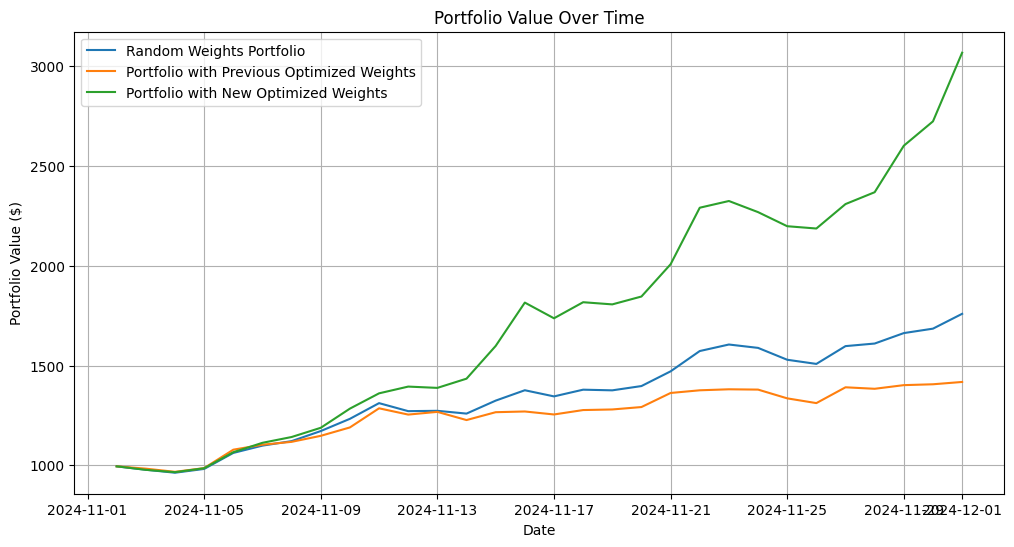

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(daily_values_random.index, daily_values_random['Total Portfolio Value'], label='Random Weights Portfolio')
plt.plot(daily_values_prev_opt.index, daily_values_prev_opt['Total Portfolio Value'], label='Portfolio with Previous Optimized Weights')
plt.plot(daily_values_new_opt.index, daily_values_new_opt['Total Portfolio Value'], label='Portfolio with New Optimized Weights')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

## Analyze the Differences

1. **Summary of Performance Metrics for Each Portfolio**
2. **Detailed Analysis of Portfolio Performance**
3. **Comparison and Analysis of Optimized Weights**
4. **Possible Causes for Changes in Weights**
5. **Conclusions**

---

### **1. Summary of Performance Metrics**

#### **Performance Metrics Comparison**

Here is the performance comparison data you've provided:

| **Metric**                | **Random Weights Portfolio** | **Portfolio with Previous Optimized Weights** | **Portfolio with New Optimized Weights** |
|---------------------------|------------------------------|----------------------------------------------|------------------------------------------|
| **Total Return**          | **0.75919** (75.919%)        | 0.41778 (41.778%)                            | **2.06738** (206.738%)                  |
| **Variance**              | 0.00104                      | **0.00092**                                  | 0.00259                                  |
| **Sharpe Ratio**          | 10.01346                     | 6.65164                                      | **12.72204**                             |
| **Maximum Drawdown**      | -0.06055 (-6.055%)           | **-0.05011** (-5.011%)                       | -0.05931 (-5.931%)                       |

- **Note**: The values for **Total Return** and **Maximum Drawdown** are in decimal form (e.g., 0.75919 represents 75.919%).

---

### **2. Detailed Analysis of Portfolio Performance**

#### **2.1. Total Return**

- **Random Weights Portfolio**: **75.919%**
- **Portfolio with Previous Optimized Weights**: **41.778%**
- **Portfolio with New Optimized Weights**: **206.738%**

**Analysis**:

- The **Portfolio with New Optimized Weights** significantly outperformed the other portfolios, achieving a total return of over 200%.
- The **Random Weights Portfolio** performed better than the **Portfolio with Previous Optimized Weights**, indicating that the previous optimized weights became less effective in the new period.

#### **2.2. Variance**

- **Random Weights Portfolio**: 0.00104
- **Portfolio with Previous Optimized Weights**: **0.00092**
- **Portfolio with New Optimized Weights**: 0.00259

**Analysis**:

- The **Portfolio with Previous Optimized Weights** had the lowest variance, indicating lower volatility in returns.
- The **Portfolio with New Optimized Weights** had the highest variance, suggesting higher volatility.

#### **2.3. Sharpe Ratio**

- **Random Weights Portfolio**: 10.01346
- **Portfolio with Previous Optimized Weights**: 6.65164
- **Portfolio with New Optimized Weights**: **12.72204**

**Analysis**:

- The **Portfolio with New Optimized Weights** achieved the highest Sharpe Ratio, indicating superior risk-adjusted returns.
- The Sharpe Ratio of the **Random Weights Portfolio** was higher than that of the **Portfolio with Previous Optimized Weights**, again suggesting that the previous optimized weights were less effective in the new period.

#### **2.4. Maximum Drawdown**

- **Random Weights Portfolio**: -6.055%
- **Portfolio with Previous Optimized Weights**: **-5.011%**
- **Portfolio with New Optimized Weights**: -5.931%

**Analysis**:

- The **Portfolio with Previous Optimized Weights** experienced the smallest maximum drawdown, indicating better capital preservation during downturns.
- The differences in maximum drawdown among portfolios are relatively small.

---

### **3. Comparison and Analysis of Optimized Weights**

#### **3.1. Optimized Weights from Previous Steps**

| **Ticker** | **Previous Optimized Weight** |
|------------|-------------------------------|
| **BTC-USD** | 0.01823 (1.823%)             |
| **ETH-USD** | 0.15150 (15.150%)            |
| **BNB-USD** | 0.55363 (55.363%)            |
| **XRP-USD** | 0.27664 (27.664%)            |
| **ADA-USD** | 0.00000 (0.000%)             |

- **Key Characteristics**:
  - Heavy allocation to **BNB-USD (Binance Coin)** at 55.363%.
  - Significant allocation to **XRP-USD (Ripple)** at 27.664%.
  - Moderate allocation to **ETH-USD (Ethereum)** at 15.150%.
  - Minimal allocation to **BTC-USD (Bitcoin)** at 1.823%.
  - No allocation to **ADA-USD (Cardano)**.

#### **3.2. Optimized Weights for the New Period**

| **Ticker** | **New Optimized Weight**      |
|------------|-------------------------------|
| **BTC-USD** | 0.20582 (20.582%)            |
| **ETH-USD** | 0.00000 (0.000%)             |
| **BNB-USD** | 0.21465 (21.465%)            |
| **XRP-USD** | 0.17628 (17.628%)            |
| **ADA-USD** | 0.40325 (40.325%)            |

- **Key Characteristics**:
  - Largest allocation to **ADA-USD (Cardano)** at 40.325%.
  - Increased allocation to **BTC-USD** at 20.582%.
  - Slightly reduced allocation to **BNB-USD** at 21.465%.
  - Reduced allocation to **XRP-USD** at 17.628%.
  - No allocation to **ETH-USD**.

---

#### **3.3. Comparison of Weights**

| **Ticker** | **Previous Weight** | **New Weight** | **Change**          |
|------------|---------------------|----------------|---------------------|
| **BTC-USD** | 1.823%              | 20.582%        | **+18.759%**        |
| **ETH-USD** | 15.150%             | 0.000%         | **-15.150%**        |
| **BNB-USD** | 55.363%             | 21.465%        | **-33.898%**        |
| **XRP-USD** | 27.664%             | 17.628%        | **-10.036%**        |
| **ADA-USD** | 0.000%              | 40.325%        | **+40.325%**        |

**Observations**:

- **BTC-USD**: Significant increase (+18.759%), signaling improved outlook for Bitcoin.
- **ETH-USD**: Complete elimination (-15.150%), suggesting unfavorable conditions for Ethereum.
- **BNB-USD**: Large decrease (-33.898%), indicating a reduction in expected performance or increased risk.
- **XRP-USD**: Moderate decrease (-10.036%).
- **ADA-USD**: Substantial introduction (+40.325%), indicating a strong positive view on Cardano.

---

### **4. Possible Causes for Changes in Weights**

#### **4.1. Market Dynamics and Asset Performance**

### **4.1.1. Cardano (ADA-USD)**

- **Possible Causes**:
  - **Projected Growth**: During this period, Cardano might have had significant positive developments (e.g., network upgrades, smart contract capabilities) leading to expectations of higher returns.
  - **Risk-Return Profile**: Improvement in the risk-return profile, making it more attractive in the optimizer.
  - **Lower Correlation**: Potentially lower correlation with other assets, providing diversification benefits.

##### **4.1.2. Bitcoin (BTC-USD)**

- **Possible Causes**:
  - **Renewed Strength**: Bitcoin may have shown signs of strong performance or lower volatility.
  - **Store of Value**: In times of market uncertainty, investors may favor Bitcoin as a more established asset.
  
##### **4.1.3. Ethereum (ETH-USD)**

- **Possible Causes**:
  - **Increased Risk**: Potential issues like network congestion or delays in upgrades may have negatively impacted Ethereum's risk profile.
  - **Competition**: Emergence of competing platforms (e.g., Cardano) may have reduced Ethereum's expected returns.
  
##### **4.1.4. Binance Coin (BNB-USD)**

- **Possible Causes**:
  - **Regulatory Concerns**: Regulatory scrutiny on Binance may have increased perceived risk.
  - **Market Share**: Shifts in market sentiment or usage away from Binance's ecosystem.

##### **4.1.5. Ripple (XRP-USD)**

- **Possible Causes**:
  - **Legal Issues**: Ongoing legal battles (e.g., SEC lawsuit) may have impacted expected returns.
  - **Market Sentiment**: Changes in market perception of Ripple's viability or adoption.

#### **4.2. Changes in Expected Returns and Volatility**

- **Expected Returns**:
  - The optimizer uses historical data to estimate expected returns. Significant price movements or trends can alter these estimates.
  - Assets showing strong upward momentum or positive news may have higher expected returns in the new period.

- **Volatility**:
  - Changes in an asset's price volatility affect its risk contribution to the portfolio.
  - Assets with reduced volatility may become more attractive, whereas increased volatility may lead to lower allocations.

#### **4.3. Changes in Correlations between Assets**

- **Diversification Benefits**:
  - The optimizer considers correlations to maximize diversification.
  - Changes in correlations can shift the allocation to balance the portfolio risk.
  - If an asset becomes less correlated with others, it may receive a higher allocation.

#### **4.4. Market Sentiment and External Factors**

- **Macro-Economic Factors**:
  - Global economic conditions, interest rates, and geopolitical events can influence asset performance.
  - Cryptocurrency regulatory developments can impact market sentiment.

- **Technological Updates and Adoption**:
  - News about technological advancements, adoption rates, and network upgrades can affect investor expectations.

---

### **5. Conclusion**

#### **5.1. Effectiveness of Re-Optimization**

- **Adaptation to Market Conditions**:
  - The significant differences in optimized weights between periods highlight the importance of re-optimizing portfolios to reflect current market conditions.
  - The new optimized weights captured the assets that performed well during the period, leading to superior portfolio performance.

#### **5.2. Portfolio Performance Insights**

- **Portfolio with New Optimized Weights**:
  - Achieved the highest total return and Sharpe Ratio.
  - Higher variance indicates increased risk, but the returns justified the additional volatility.

- **Portfolio with Previous Optimized Weights**:
  - Underperformed due to allocations that were no longer optimal.
  - Lower variance and maximum drawdown suggest stability but at the expense of returns.

#### **5.3. Importance of Dynamic Asset Allocation**

- **Market Shifts**:
  - Cryptocurrency markets are highly dynamic, with rapid shifts in asset performance.
  - Static asset allocations may become outdated quickly.

- **Optimization Frequency**:
  - Regular re-optimization (e.g., monthly or quarterly) is essential to capture new opportunities and manage risks effectively.

---

### **6. Final Thoughts**

The analysis demonstrates that portfolio optimization is a dynamic process that must adapt to changing market conditions. By updating the optimized weights to reflect current expectations of asset returns, risks, and correlations, investors can enhance portfolio performance and achieve better risk-adjusted returns.

The significant changes in asset allocations between the previous and new optimized portfolios underscore how market sentiment and asset-specific developments can impact optimization outcomes. In the context of rapidly evolving markets like cryptocurrencies, staying agile and responsive is crucial.

Investors should balance the pursuit of higher returns with prudent risk management practices, ensuring that their portfolios remain aligned with their investment objectives and risk tolerance.



## Analysis of Plot

### **1. General Observations**

- **Portfolio with New Optimized Weights (Green Line)**:
  - This portfolio clearly outperformed the other two, showing the steepest growth and ending with the highest portfolio value (~$3,000).
  - The portfolio experienced some fluctuations but demonstrated strong upward momentum, especially after **2024-11-15**.

- **Random Weights Portfolio (Blue Line)**:
  - This portfolio exhibited moderate growth, consistently outperforming the Portfolio with Previous Optimized Weights but lagging behind the Portfolio with New Optimized Weights.
  - The portfolio value increased steadily and ended around ~$1,700.

- **Portfolio with Previous Optimized Weights (Orange Line)**:
  - This portfolio underperformed the other two, showing the slowest growth and the lowest final portfolio value (~$1,400).
  - The portfolio value remained relatively flat, with minimal upward movement compared to the other portfolios.

---

### **2. Key Time Periods**

#### **Early Period (2024-11-01 to 2024-11-08)**:
- All three portfolios started at the same initial value (~$1,000).
- The **Portfolio with New Optimized Weights** began to slightly outperform the others as early as **2024-11-05**, reflecting its superior allocation strategy.

#### **Mid Period (2024-11-09 to 2024-11-20)**:
- The **Portfolio with New Optimized Weights** showed significant growth, pulling away from the other two portfolios.
- The **Random Weights Portfolio** exhibited moderate growth, while the **Portfolio with Previous Optimized Weights** remained relatively stagnant.

#### **Late Period (2024-11-21 to 2024-12-01)**:
- The **Portfolio with New Optimized Weights** experienced rapid growth, particularly after **2024-11-25**, reaching its peak around ~$3,000.
- The **Random Weights Portfolio** continued to grow steadily but at a slower pace.
- The **Portfolio with Previous Optimized Weights** showed minor improvement but remained the weakest performer.

---

### **3. Performance Comparison**

#### **Portfolio with New Optimized Weights**:
- **Strongest Performance**: The steep upward trajectory indicates that the asset allocation for this portfolio was highly effective in capturing market opportunities.
- **Superior Returns**: The final portfolio value of ~$3,000 reflects a **206.738% total return**, as calculated earlier.
- **Volatility**: The portfolio experienced some fluctuations, particularly in the mid-period, but the overall trend remained strongly positive.

#### **Random Weights Portfolio**:
- **Moderate Performance**: This portfolio grew steadily, ending with a final value of ~$1,700, reflecting a **75.919% total return**.
- **Less Efficient Allocation**: While it performed better than the Portfolio with Previous Optimized Weights, its random allocation likely missed out on the best-performing assets.

#### **Portfolio with Previous Optimized Weights**:
- **Weakest Performance**: The portfolio value increased only slightly, ending at ~$1,400, reflecting a **41.778% total return**.
- **Outdated Allocation**: The weights optimized for a previous period were not effective in capturing the opportunities of the new market conditions.
- **Flat Growth**: The lack of significant upward movement suggests that the portfolio was poorly positioned for the market dynamics during this period.

---

### **4. Insights from the Plot**

1. **Importance of Re-Optimization**:
   - The **Portfolio with New Optimized Weights** outperformed the others because it was tailored to the specific market conditions of the period.
   - The **Portfolio with Previous Optimized Weights** underperformed, demonstrating that weights optimized for past conditions may not remain effective in the future.

2. **Market Dynamics**:
   - The steep growth of the **Portfolio with New Optimized Weights** suggests that certain assets (e.g., ADA-USD and BTC-USD) performed exceptionally well during this period, and the new optimization successfully capitalized on this trend.

3. **Risk-Return Trade-Off**:
   - The **Portfolio with New Optimized Weights** likely took on more risk (as indicated by its higher variance) but achieved significantly higher returns, making it the most efficient portfolio in terms of risk-adjusted performance.

4. **Random Weights Portfolio**:
   - Despite being randomly allocated, this portfolio performed better than the Portfolio with Previous Optimized Weights, highlighting the potential inefficiency of outdated optimized weights.

---

### **5. Conclusion**

- **Portfolio with New Optimized Weights**:
  - Best performer, demonstrating the value of re-optimization and dynamic portfolio management.
  - The significant growth indicates that the new allocation captured the best-performing assets during the period.

- **Random Weights Portfolio**:
  - Performed moderately well, suggesting that even random allocations can outperform outdated optimization if market conditions shift.

- **Portfolio with Previous Optimized Weights**:
  - Underperformed significantly, emphasizing the risks of relying on static allocations in dynamic markets.

---

This plot clearly illustrates the importance of dynamic portfolio management and re-optimization in achieving superior performance in volatile markets like cryptocurrencies.